In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv',sep=',')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Preprocessing Data
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [7]:
label_quality = LabelEncoder()

In [8]:
wine['quality']=label_quality.fit_transform(wine['quality'])

In [9]:
# Look at quality changes
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

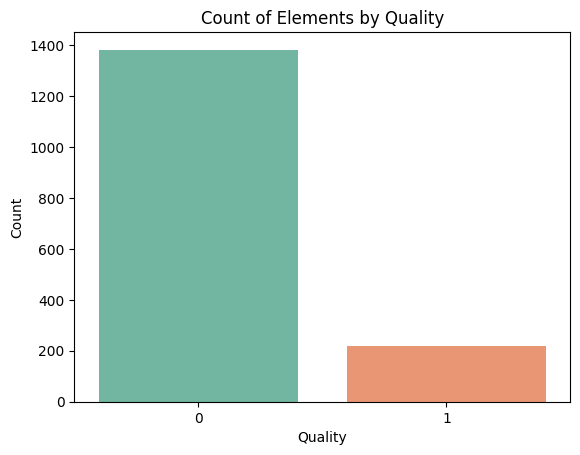

In [13]:
# Generate some example data (you should replace this with your actual data)
data = wine['quality']
df = pd.DataFrame(data)

# Use seaborn to plot the bar graph with custom color palette and set legend=False
sns.countplot(x='quality', data=df, hue='quality', palette='Set2', legend=False)

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Elements by Quality')

# Show the plot
plt.show()

In [25]:
#Now separate the dataset as response variable and feature variables
X = wine.drop('quality',axis =1) # all the features of wine without quality
y = wine['quality'] # only quality column

In [26]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [28]:
#Applying Standar scaling to get optimized results
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h1>Random Forest Classifier</h1>

In [32]:
# Only needs to be player with the n_estimator to control the tree
# Used for mid-range dataSet

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [33]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [35]:
#Let's see how the model perform
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.72      0.49      0.58        47

    accuracy                           0.90       320
   macro avg       0.82      0.73      0.76       320
weighted avg       0.89      0.90      0.89       320



In [36]:
#Confusion Matrix
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 24  23]]


266 Correct Bad Wine <br>
9   Incorrect Bad wine <br>
24  Incorrect Good Wine <br>
23  Correct Good wine <br>

<h1>SVM Classifier</h1>

In [41]:
# Use in small datasets

clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [42]:
#Let's see how the model perform
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [43]:
#Confusion Matrix
print(confusion_matrix(y_test, pred_clf))

[[268   5]
 [ 35  12]]


<h1>Neural Network</h1>

In [46]:
# Big chunks of data

# Multilayer Perceptron Classifier
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train, y_train)
mlpc_clf = mlpc.predict(X_test)

/Users/Erick/Programs/tutorials/Scikit/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [47]:
#Let's see how the model perform
print(classification_report(y_test, mlpc_clf))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1       0.71      0.62      0.66        47

    accuracy                           0.91       320
   macro avg       0.82      0.79      0.80       320
weighted avg       0.90      0.91      0.90       320



In [48]:
#Confusion Matrix
print(confusion_matrix(y_test, mlpc_clf))

[[261  12]
 [ 18  29]]
